In [22]:
import numpy as np
import pandas as pd
import os
import wfdb
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
all_signal=[]
meta_data=[]
for file in sorted(os.listdir("./data/")):
    if file.endswith(".dat"):
      #（fs|units|sig_name|comments）
        signals, fields = wfdb.rdsamp("./data/" + os.path.splitext(file)[0])
       
        all_signal.append(signals)
      
        meta_data.append(fields)

In [24]:
i=1
for item in meta_data:
    print("driver",i)
    i=i+1
    print("total time(min):", round(item['sig_len']/15.5/60, 2))
    print("sigal number:",item['n_sig'])
    print("sigal name:",item['sig_name'])
    print("--------------------")

driver 1
total time(min): 66.13
sigal number: 6
sigal name: ['ECG', 'EMG', 'foot GSR', 'hand GSR', 'HR', 'RESP']
--------------------
driver 2
total time(min): 83.93
sigal number: 5
sigal name: ['ECG', 'foot GSR', 'HR', 'marker', 'RESP']
--------------------
driver 3
total time(min): 185.43
sigal number: 4
sigal name: ['ECG', 'foot GSR', 'hand GSR', 'RESP']
--------------------
driver 4
total time(min): 82.01
sigal number: 6
sigal name: ['ECG', 'foot GSR', 'hand GSR', 'HR', 'marker', 'RESP']
--------------------
driver 5
total time(min): 84.27
sigal number: 7
sigal name: ['ECG', 'EMG', 'foot GSR', 'hand GSR', 'HR', 'marker', 'RESP']
--------------------
driver 6
total time(min): 80.78
sigal number: 7
sigal name: ['ECG', 'EMG', 'foot GSR', 'hand GSR', 'HR', 'marker', 'RESP']
--------------------
driver 7
total time(min): 88.65
sigal number: 7
sigal name: ['ECG', 'EMG', 'foot GSR', 'hand GSr', 'HR', 'marker', 'RESP']
--------------------
driver 8
total time(min): 81.19
sigal number: 7
si

In [25]:
meta_data

[{'fs': 15.5,
  'sig_len': 61499,
  'n_sig': 6,
  'base_date': None,
  'base_time': None,
  'units': ['mV', 'mV', 'mV', 'mV', 'bpm', 'mV'],
  'sig_name': ['ECG', 'EMG', 'foot GSR', 'hand GSR', 'HR', 'RESP'],
  'comments': []},
 {'fs': 15.5,
  'sig_len': 78056,
  'n_sig': 5,
  'base_date': None,
  'base_time': None,
  'units': ['mV', 'mV', 'bpm', 'mV', 'mV'],
  'sig_name': ['ECG', 'foot GSR', 'HR', 'marker', 'RESP'],
  'comments': []},
 {'fs': 31,
  'sig_len': 172447,
  'n_sig': 4,
  'base_date': None,
  'base_time': None,
  'units': ['mV', 'mV', 'mV', 'mV'],
  'sig_name': ['ECG', 'foot GSR', 'hand GSR', 'RESP'],
  'comments': []},
 {'fs': 15.5,
  'sig_len': 76266,
  'n_sig': 6,
  'base_date': None,
  'base_time': None,
  'units': ['mV', 'mV', 'mV', 'bpm', 'mV', 'mV'],
  'sig_name': ['ECG', 'foot GSR', 'hand GSR', 'HR', 'marker', 'RESP'],
  'comments': []},
 {'fs': 15.5,
  'sig_len': 78367,
  'n_sig': 7,
  'base_date': None,
  'base_time': None,
  'units': ['mV', 'mV', 'mV', 'mV', 'bpm'

In [26]:
all_signal

[array([[-3.0000e-02, -7.2000e-03,  2.5040e+00,  1.1146e+01,  8.4000e+01,
          1.0948e+01],
        [-2.6000e-02, -3.3000e-03,  2.5120e+00,  1.1136e+01,  8.4000e+01,
          1.0958e+01],
        [-1.6000e-02,  1.9000e-03,  2.5140e+00,  1.1127e+01,  8.4000e+01,
          1.0982e+01],
        ...,
        [ 6.7000e-02, -4.9000e-03,  1.7850e+00,  2.3291e+01,  9.4000e+01,
          1.1642e+01],
        [ 5.4000e-02,  1.5000e-03,  1.7850e+00,  2.3502e+01,  9.4000e+01,
          1.1750e+01],
        [ 4.9000e-02, -6.4000e-03,  1.7860e+00,  2.3738e+01,  9.4000e+01,
          1.1828e+01]]),
 array([[-6.03000000e-01,  1.80200000e+00,  7.49925007e+01,
          0.00000000e+00,  1.15740000e+01],
        [-4.09000000e-01,  1.80200000e+00,  7.49925007e+01,
          0.00000000e+00,  1.14720000e+01],
        [-4.05000000e-01,  1.80200000e+00,  7.79922008e+01,
          0.00000000e+00,  1.13880000e+01],
        ...,
        [ 6.07000000e-01,  1.17900000e+00,  9.99900010e+01,
          1.875000

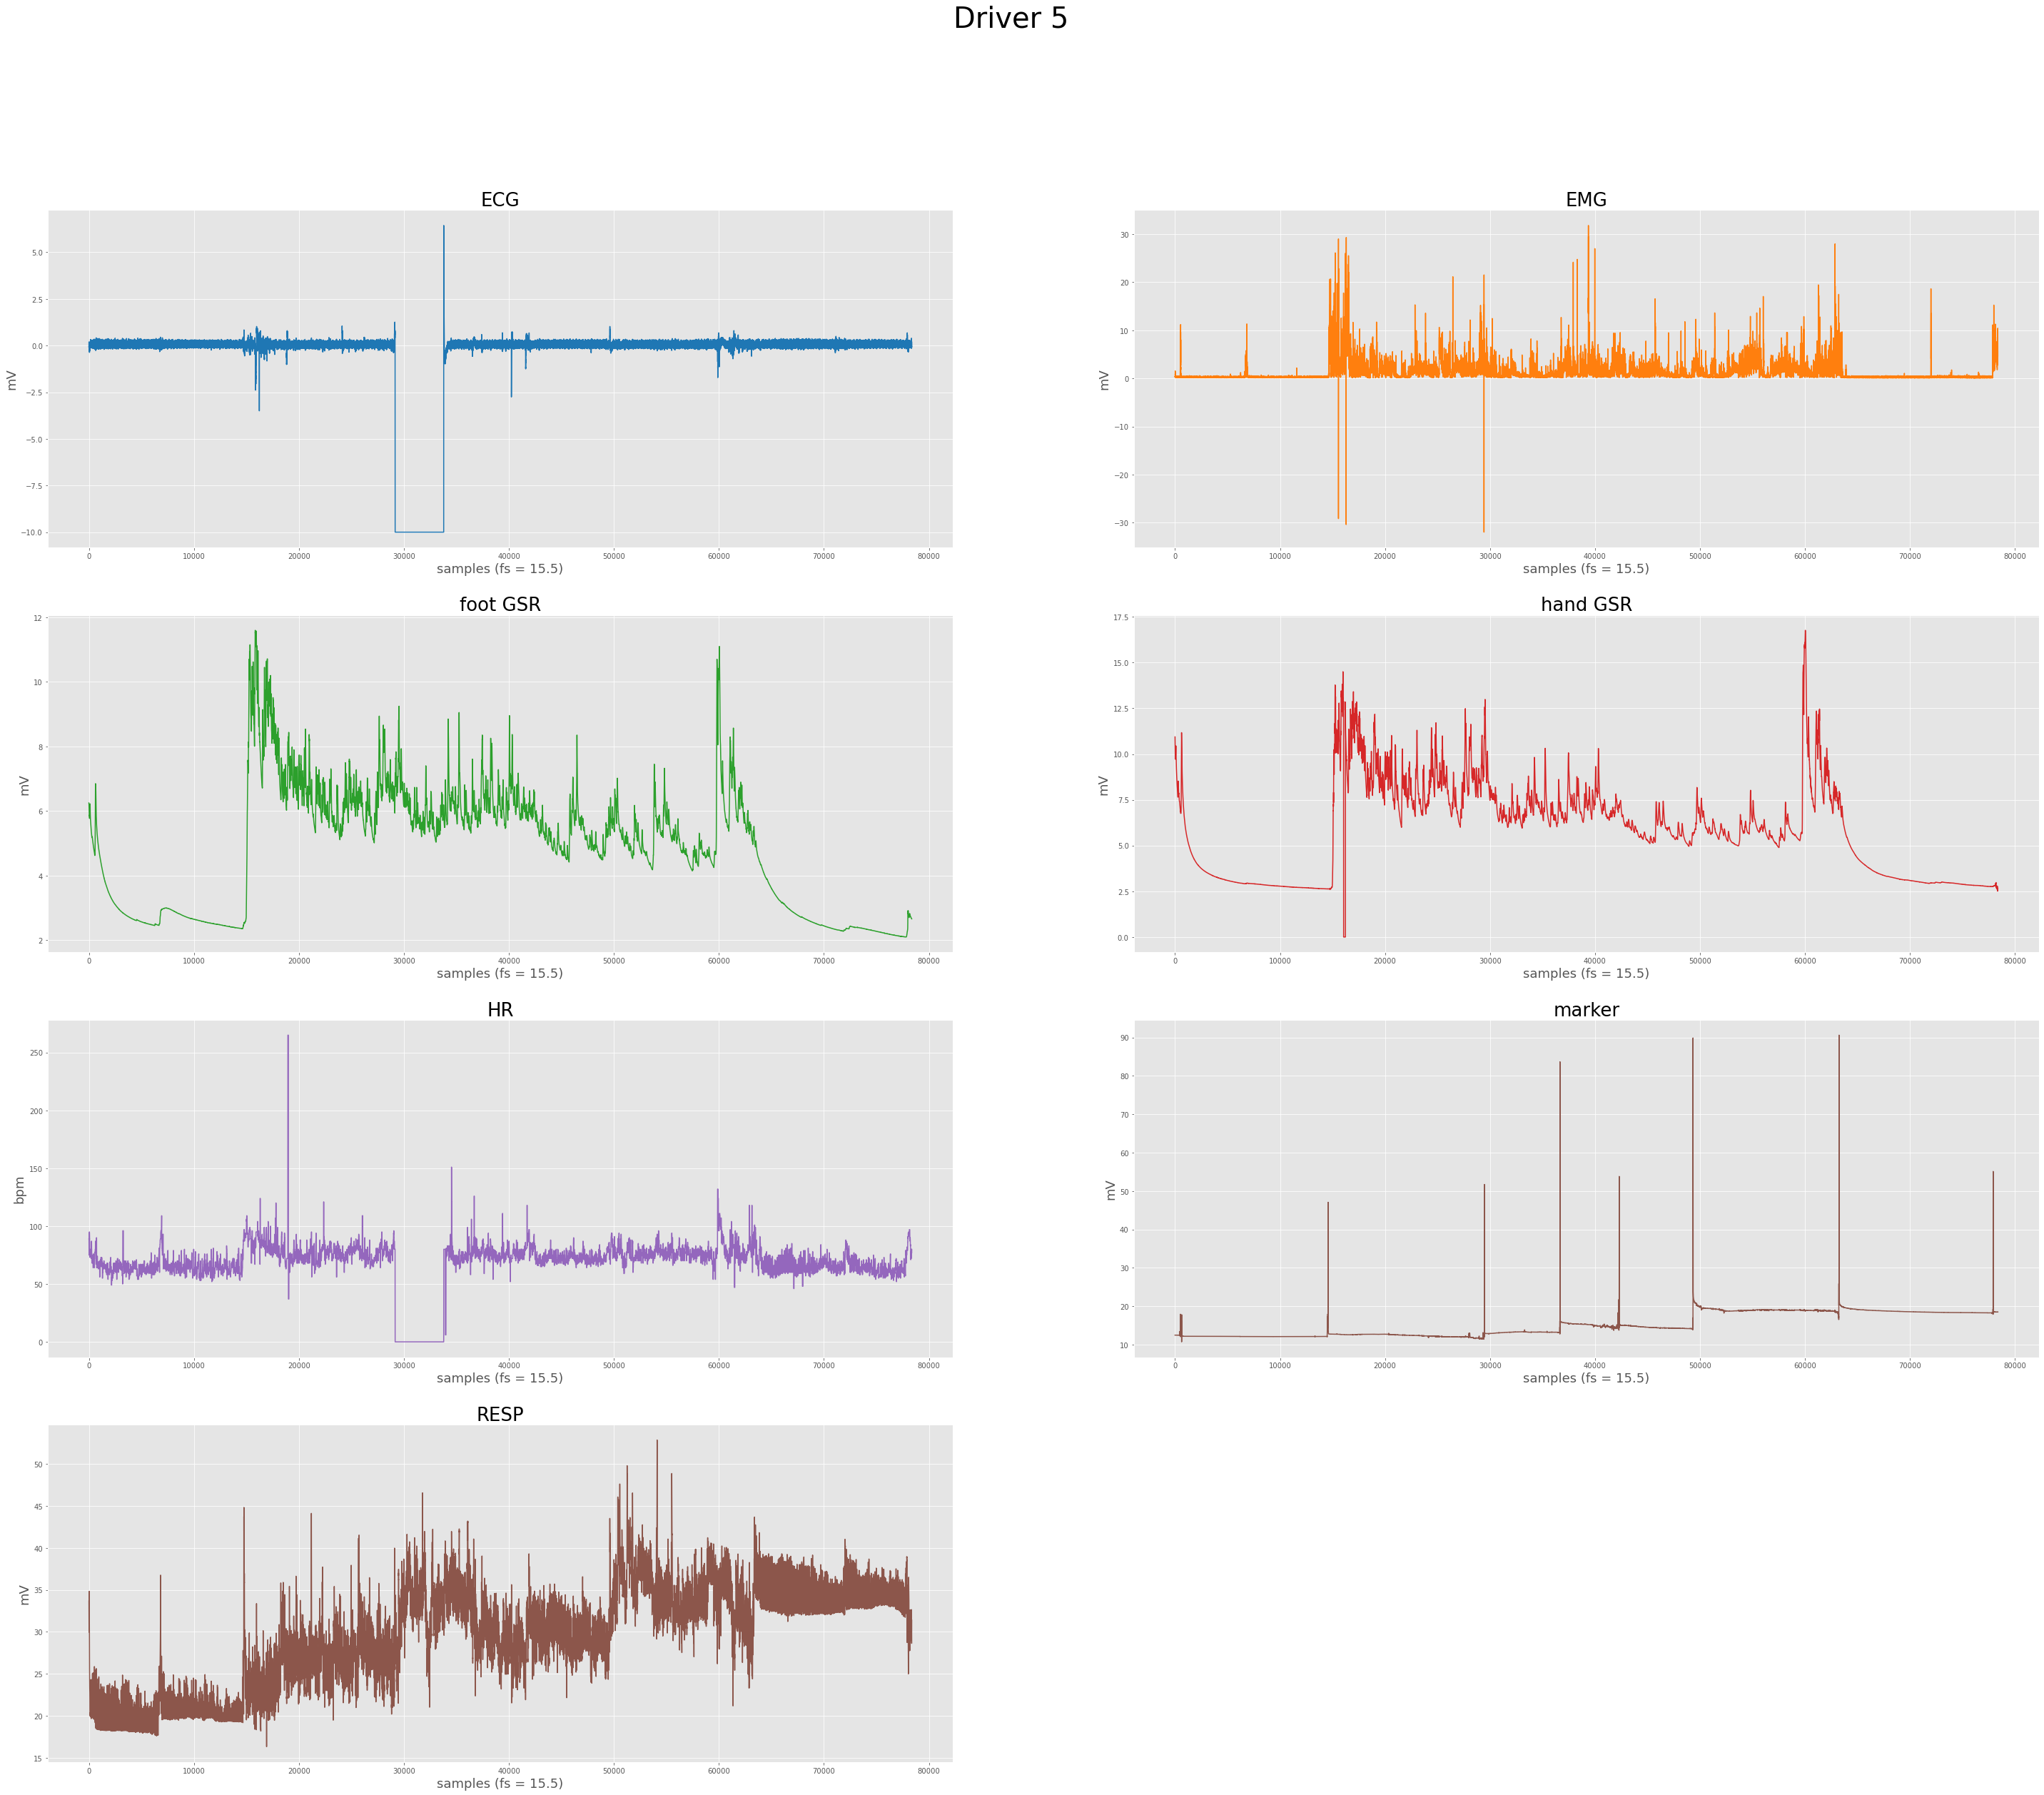

In [27]:
my_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#8c564b"]
plt.style.use('ggplot')
plt.figure(figsize=(50, 40))
plt.suptitle("Driver 5", fontsize=40)
for i in range(all_signal[4].shape[1]):
    plt.subplot(4, 2, i + 1)
    plt.ylabel(meta_data[4]['units'][i], fontsize=18)
    plt.xlabel("samples (fs = 15.5)", fontsize=18)
    plt.plot(all_signal[4].T[i], color=my_colors[i])
    plt.title(meta_data[4]['sig_name'][i],fontsize=26)

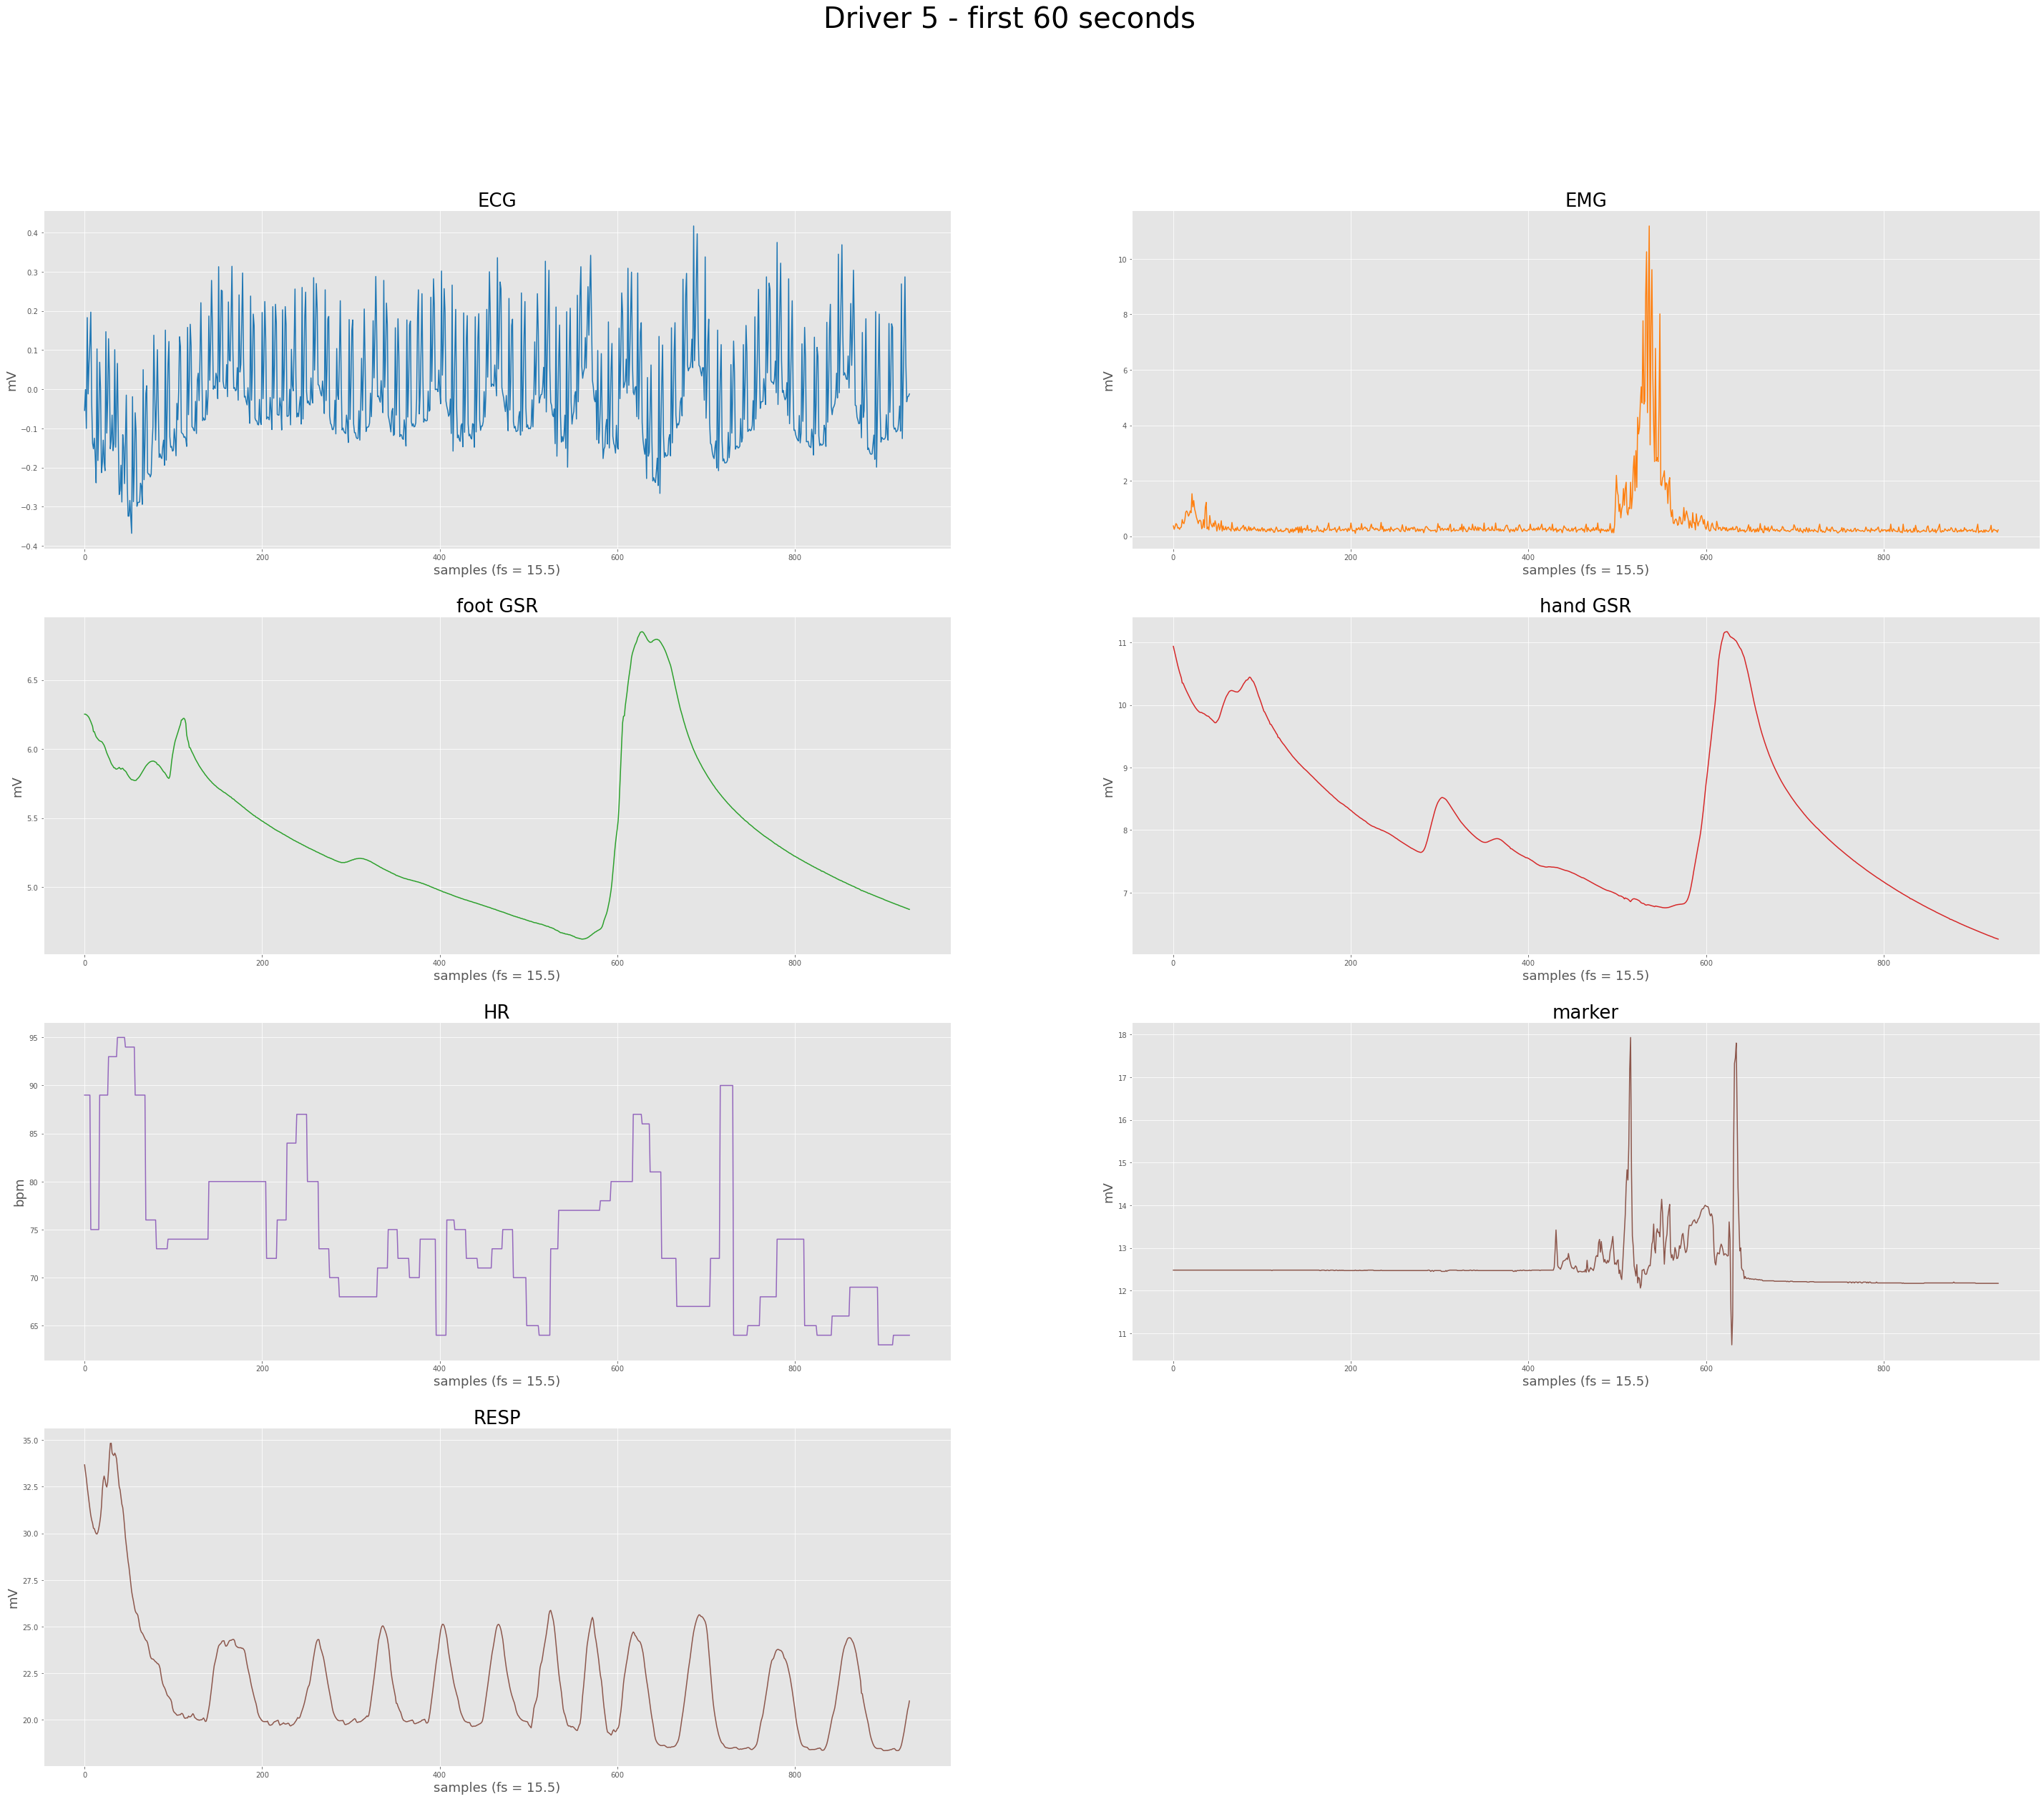

In [28]:
my_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#8c564b"]
plt.style.use('ggplot')
plt.figure(figsize=(50, 40))
plt.suptitle("Driver 5 - first 60 seconds", fontsize=40)
for i in range(all_signal[4].shape[1]):
    plt.subplot(4, 2, i + 1)
    plt.ylabel(meta_data[4]['units'][i], fontsize=18)
    plt.xlabel("samples (fs = 15.5)", fontsize=18)
    plt.plot(all_signal[4].T[i][0:int(15.5 * 60)], color=my_colors[i])
    plt.title(meta_data[4]['sig_name'][i],fontsize=26)

In [29]:
signal_1 = all_signal[4:12]
signal_2 = all_signal[14:16]
signal = signal_1 + signal_2

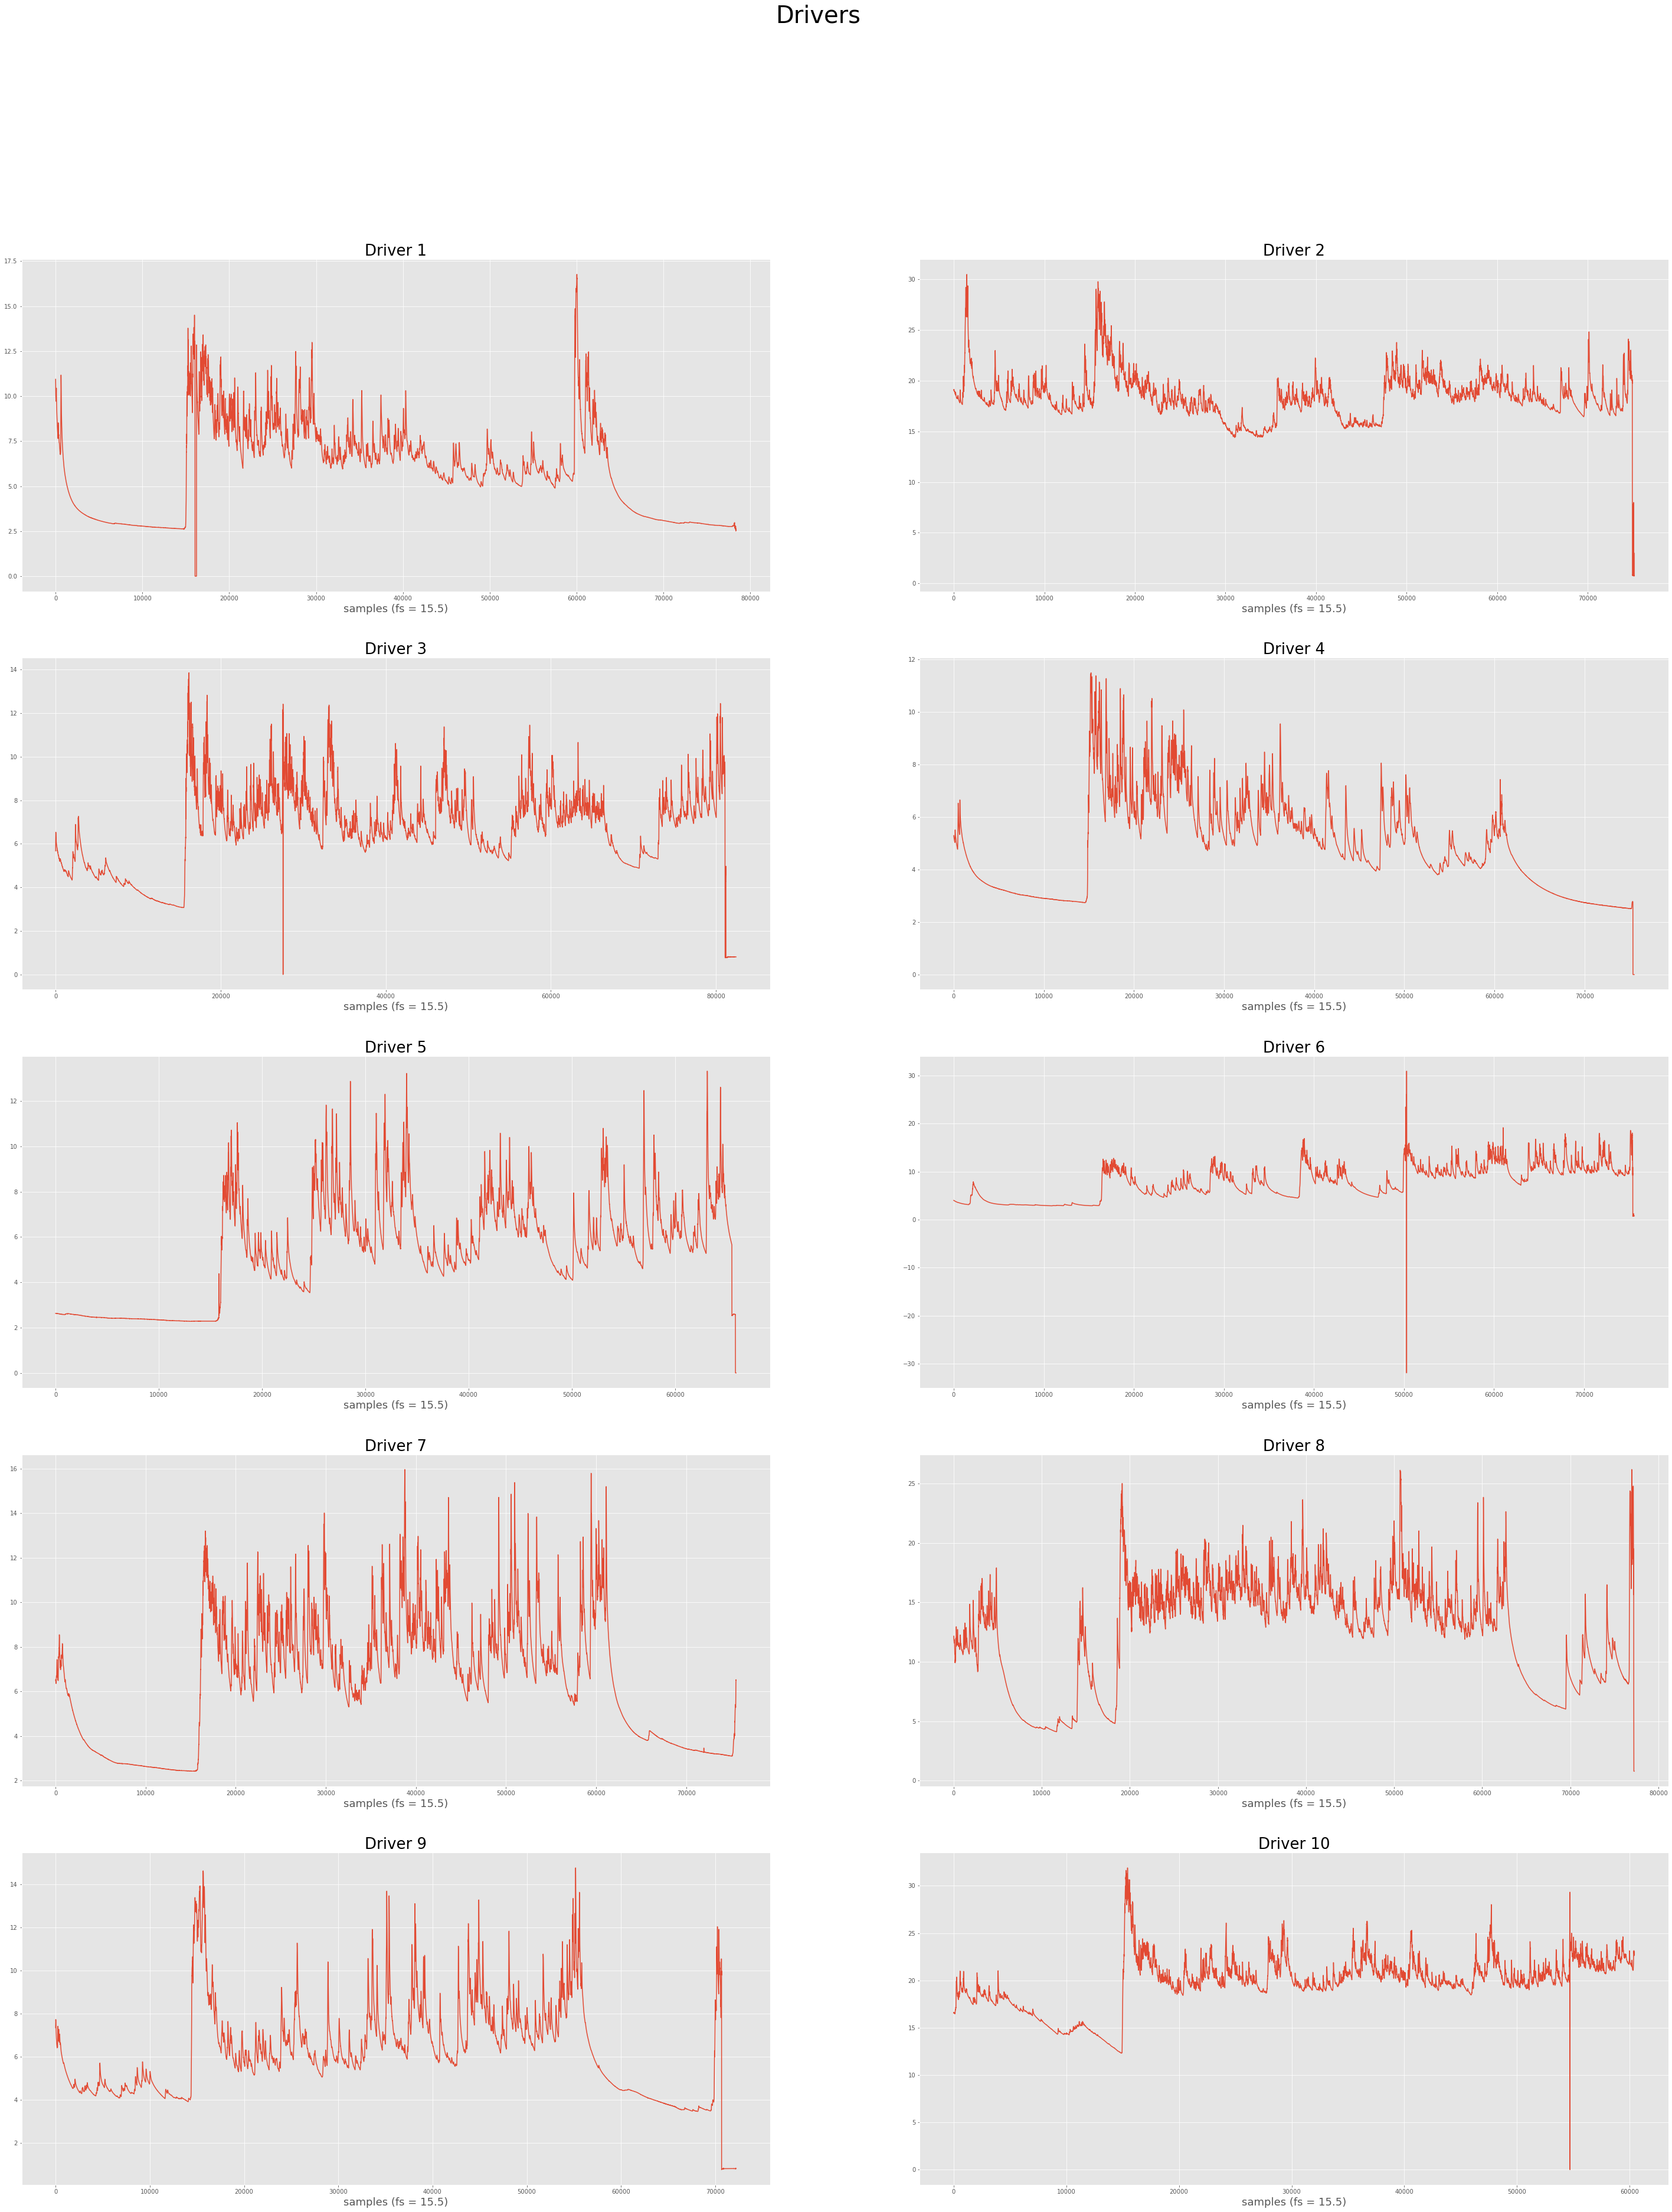

In [30]:
plt.style.use('ggplot')
plt.figure(figsize=(50, 60))
plt.suptitle("Drivers", fontsize=40)
for i in range(0, 10):
    plt.subplot(5, 2, i + 1)
    plt.xlabel("samples (fs = 15.5)", fontsize=18)
    plt.plot(signal[i].T[3])
    plt.title("Driver %d" % (i + 1),fontsize=26)

In [31]:
df_time_intervals = pd.read_csv('time_intervals.csv')

In [32]:
df_time_intervals

,Drive No,Initial Rest,City 1,Highway,City 2,Highway 2,City 3,Final Rest,Total rec. time(min)
0,Drive05,15.13,16.00,7.74,6.06,7.56,14.96,15.75,83.23
1,Drive06,15.05,14.49,7.32,6.53,7.64,12.29,15.05,78.38
2,Drive07,15.04,16.23,10.96,9.83,7.64,10.15,15.03,84.87
3,Drive08,15.00,12.31,7.23,9.51,7.64,13.43,15.07,80.19
4,Drive09,15.66,19.21,8.47,5.20,7.06,13.21,NaN,68.82
5,Drive10,15.04,15.30,8.66,5.27,7.04,12.06,14.79,78.15
6,Drive11,15.02,15.81,7.43,7.15,6.96,11.72,14.99,79.08
7,Drive12,15.01,13.41,7.56,6.50,8.06,11.68,15.01,77.23
8,Drive15,15.00,12.54,7.24,5.99,6.82,12.12,15.00,74.70
9,Drive16,15.01,16.12,7.14,5.12,6.81,13.91,NaN,64.10


In [33]:

df_time_intervals.columns = ['Drive', 'Rest1', 'City1', 'Hwy1', 'City2', 'Hwy2', 'City3', 'Rest2', 'Total']

df_time_start = df_time_intervals.copy()
df_time_start['Rest1'] = 0
df_time_start['City1'] = df_time_start['Rest1'] + df_time_intervals['Rest1']
df_time_start['Hwy1'] = df_time_start['City1'] + df_time_intervals['City1']
df_time_start['City2'] = df_time_start['Hwy1'] + df_time_intervals['Hwy1']
df_time_start['Hwy2'] = df_time_start['City2'] + df_time_intervals['City2']
df_time_start['City3'] = df_time_start['Hwy2'] + df_time_intervals['Hwy2']
df_time_start['Rest2'] = df_time_start['City3'] + df_time_intervals['City3']
df_time_start

,Drive,Rest1,City1,Hwy1,City2,Hwy2,City3,Rest2,Total
0,Drive05,0,15.13,31.13,38.87,44.93,52.49,67.45,83.23
1,Drive06,0,15.05,29.54,36.86,43.39,51.03,63.32,78.38
2,Drive07,0,15.04,31.27,42.23,52.06,59.70,69.85,84.87
3,Drive08,0,15.00,27.31,34.54,44.05,51.69,65.12,80.19
4,Drive09,0,15.66,34.87,43.34,48.54,55.60,68.81,68.82
5,Drive10,0,15.04,30.34,39.00,44.27,51.31,63.37,78.15
6,Drive11,0,15.02,30.83,38.26,45.41,52.37,64.09,79.08
7,Drive12,0,15.01,28.42,35.98,42.48,50.54,62.22,77.23
8,Drive15,0,15.00,27.54,34.78,40.77,47.59,59.71,74.70
9,Drive16,0,15.01,31.13,38.27,43.39,50.20,64.11,64.10


In [34]:

df_time_sample = df_time_start.drop(['Drive', 'Total'], axis=1)

df_time_sample['Rest1'] += 10

df_time_sample['City1'] += 5

df_time_sample['Hwy1'] += 4

df_time_sample['City2'] += 3

df_time_sample['Hwy2'] += 4

df_time_sample['City3'] += 5

df_time_sample['Rest2'] += 5

df_time_sample.loc[4, 'Rest2'] = None
df_time_sample.loc[9, 'Rest2'] = None
df_time_sample

,Rest1,City1,Hwy1,City2,Hwy2,City3,Rest2
0,10,20.13,35.13,41.87,48.93,57.49,72.45
1,10,20.05,33.54,39.86,47.39,56.03,68.32
2,10,20.04,35.27,45.23,56.06,64.70,74.85
3,10,20.00,31.31,37.54,48.05,56.69,70.12
4,10,20.66,38.87,46.34,52.54,60.60,NaN
5,10,20.04,34.34,42.00,48.27,56.31,68.37
6,10,20.02,34.83,41.26,49.41,57.37,69.09
7,10,20.01,32.42,38.98,46.48,55.54,67.22
8,10,20.00,31.54,37.78,44.77,52.59,64.71
9,10,20.01,35.13,41.27,47.39,55.20,NaN


In [35]:
def smaple_data(Drive_num, sample_time):
    result_list = []
    loc_start = int(sample_time * 15.5 * 60)
    # print("         ", Drive_num + 1, loc_start)
    loc_end = int(loc_start + 60 * 15.5)
    # ecg_data
    ecg_data = round(sum(signal[Drive_num].T[0][loc_start:loc_end])/(60 * 15.5), 7)
    result_list.append(ecg_data)
    # mhGSR_data
    mhGSR_data = round(sum(signal[Drive_num].T[3][loc_start:loc_end])/(60 * 15.5), 2)
    result_list.append(mhGSR_data)
    # mfGSR
    mfGSR_data = round(sum(signal[Drive_num].T[2][loc_start:loc_end])/(60 * 15.5), 2)
    result_list.append(mfGSR_data)
    # mEMG
    mEMG_data = round(sum(signal[Drive_num].T[1][loc_start:loc_end])/(60 * 15.5), 2)
    result_list.append(mEMG_data)
    # rEMG
    rEMG_data = round(math.sqrt(sum([x ** 2 for x in signal[Drive_num].T[1][loc_start:loc_end]]) / (60 * 15.5)), 2)
    # rEMG_data = round(sum(signal[Drive_num].T[1][loc_start:loc_end])/(60 * 15.5), 2)
    result_list.append(rEMG_data)
    # RR
    RR_data = round(sum(signal[Drive_num].T[6][loc_start:loc_end])/(60 * 15.5), 2)
    result_list.append(RR_data)
    # mHR
    mHR_data = round(sum(signal[Drive_num].T[4][loc_start:loc_end])/(60 * 15.5), 2)
    result_list.append(mHR_data)
    return result_list

In [36]:
df = pd.DataFrame(columns=['ecg', 'mhGSR', 'mfGSR', 'mEMG', 'rEMG', 'RR', 'mHR', 'stress'])
for Drive_num in range(0,10):
    # 采样Rest1
    result = smaple_data(Drive_num, df_time_sample.loc[Drive_num, 'Rest1'])
    result.append(1)
    df.loc[len(df)] = result
    # 采样City1
    result = smaple_data(Drive_num, df_time_sample.loc[Drive_num, 'City1'])
    result.append(5)
    df.loc[len(df)] = result
    # 采样Hwy1
    result = smaple_data(Drive_num, df_time_sample.loc[Drive_num, 'Hwy1'])
    result.append(3)
    df.loc[len(df)] = result
    # 采样City2
    result = smaple_data(Drive_num, df_time_sample.loc[Drive_num, 'City2'])
    result.append(5)
    df.loc[len(df)] = result
    # 采样Hwy2
    result = smaple_data(Drive_num, df_time_sample.loc[Drive_num, 'Hwy2'])
    result.append(3)
    df.loc[len(df)] = result
    result = smaple_data(Drive_num, df_time_sample.loc[Drive_num, 'City3'])
    result.append(5)
    df.loc[len(df)] = result
    # 采样Rest2
    if((Drive_num == 4) or (Drive_num == 9)):
        continue
    result = smaple_data(Drive_num, df_time_sample.loc[Drive_num, 'Rest2'])
    result.append(1)
    df.loc[len(df)] = result

pd.set_option('display.max_rows', None)    
df

,ecg,mhGSR,mfGSR,mEMG,rEMG,RR,mHR,stress
0,-0.004546,2.79,2.67,0.21,0.22,20.95,64.85,1.0
1,-0.011234,9.39,7.15,1.94,2.57,26.22,80.28,5.0
2,-10.000000,6.67,5.50,0.57,0.64,33.05,0.00,3.0
3,-0.001468,7.38,6.18,2.53,3.79,28.14,74.94,5.0
4,0.002203,6.19,5.56,1.85,2.45,28.63,73.96,3.0
5,-0.006147,5.70,5.39,2.25,2.53,34.93,78.50,5.0
6,-0.000426,3.32,2.72,0.17,0.18,35.36,64.72,1.0
7,-0.005017,19.27,8.61,0.63,0.67,35.68,87.03,1.0
8,-0.012275,20.31,12.47,0.75,1.31,39.00,105.44,5.0
9,-0.005663,15.61,8.18,0.79,1.66,30.75,91.75,3.0


In [37]:
df_low = df[df['stress'] == 1.0]
df_medium = df[df['stress'] == 3.0]
df_high = df[df['stress'] == 5.0]

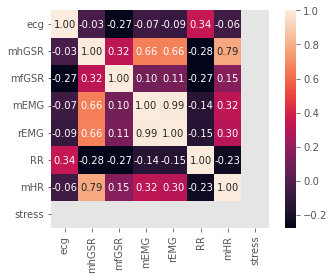

In [38]:
#low
g = sns.heatmap(df_low.corr(), square=True, annot=True, fmt='0.2f')
plt.show()

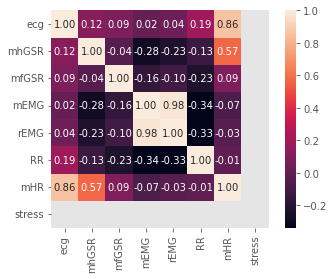

In [39]:
#resting
g = sns.heatmap(df_medium.corr(), square=True, annot=True, fmt='0.2f')
plt.show()

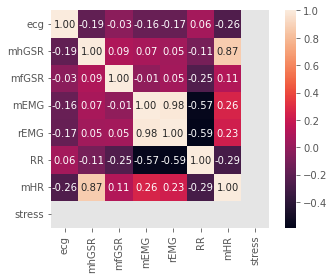

In [40]:
# highway
g = sns.heatmap(df_high.corr(), square=True, annot=True, fmt='0.2f')
plt.show()

In [41]:

X = df.drop(columns=['stress'])

y = df['stress']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

1295.5719252674849

In [ ]:
# Transform the data

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)



In [ ]:
# # Fit the model
# rf_model = RandomForestClassifier(random_state = 2020)
# rf_model.fit(X_train,y_train)

In [ ]:
# # Make prediction
# y_pred = rf_model.predict(X_test)
# acc_rf = accuracy_score(y_test,y_pred)
# print('Accuracy = ', acc_rf)

In [ ]:
# # Importance feature
# imp_rf = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_),columns = ["feature", "importance"])
# imp_rf.set_index("feature", inplace=True)
# imp_rf.sort_values(by = "importance", ascending = False, inplace = True)
# imp_rf.head()